In [25]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

print(f"Python Version: {sys.version}")
print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Seaborn Version: {sns.__version__}")
print(f"Matplotlib Version: {mpl.__version__}")

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas Version: 2.2.2
NumPy Version: 2.0.2
Seaborn Version: 0.13.2
Matplotlib Version: 3.10.0


Generating plots for 6 specific safety factors...

--- Average No Factor Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.429333
                Low Income      0.525108
Roundabout      High Income     2.253391
                Low Income      5.505114
Name: rate_NO_FACTOR, dtype: float64



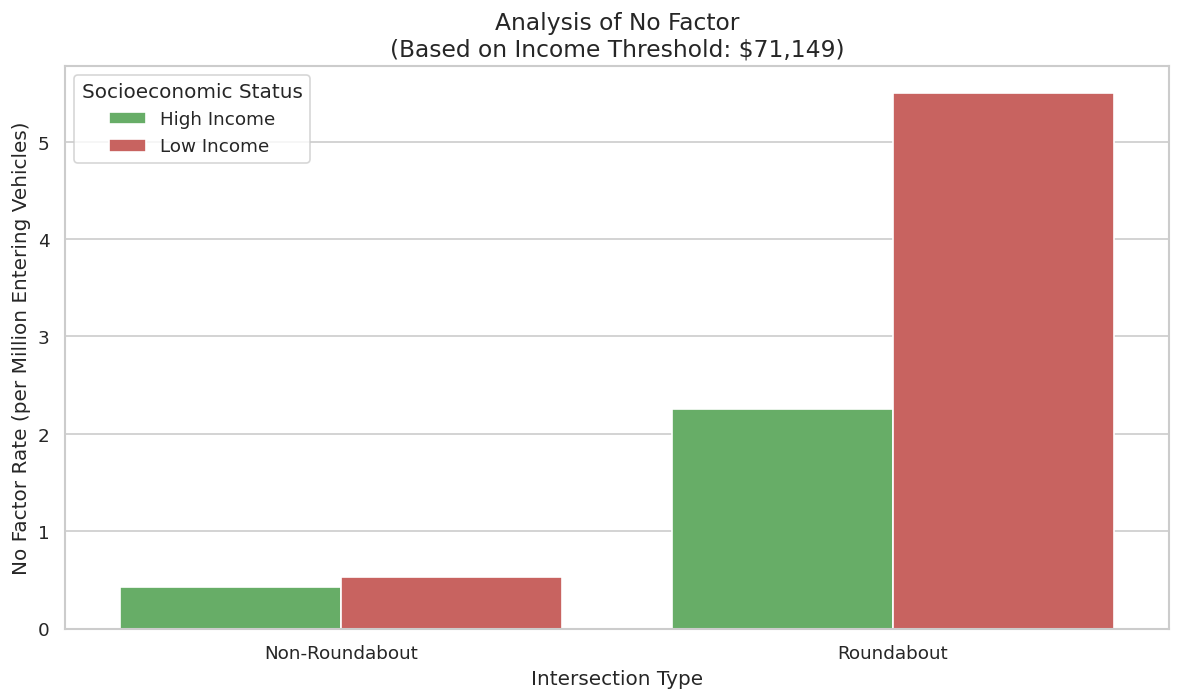

--- Average Distracted Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.038608
                Low Income      0.038687
Roundabout      High Income     0.111990
                Low Income      0.097825
Name: rate_DISTRACTED, dtype: float64



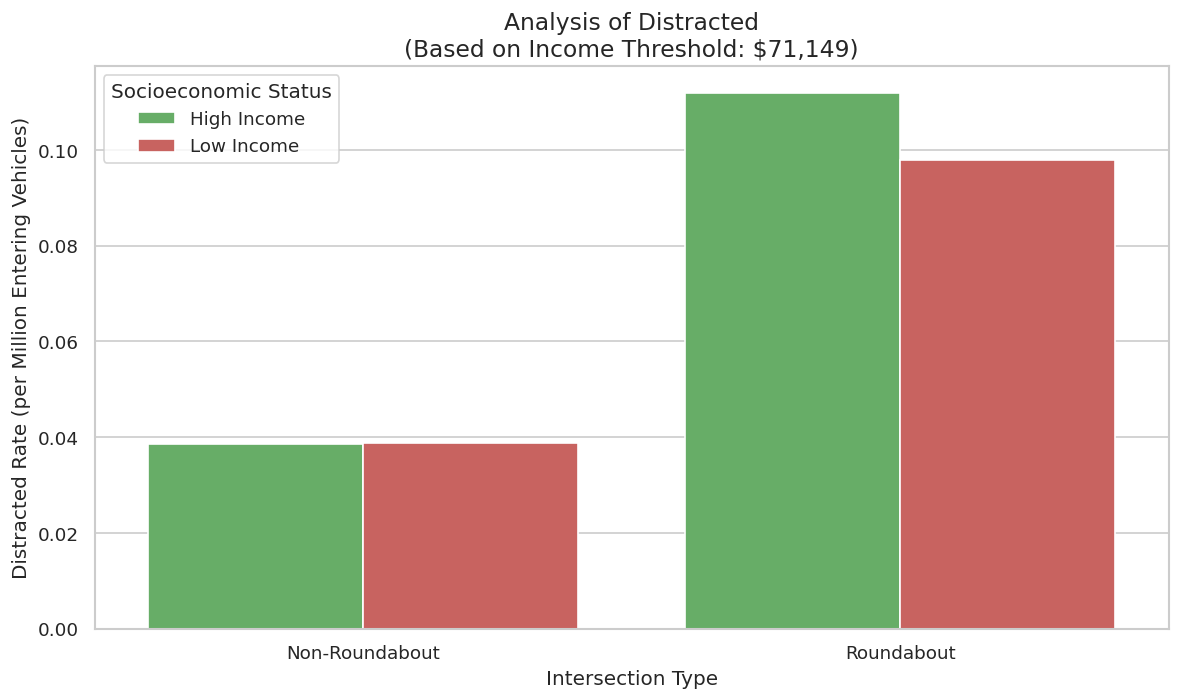

--- Average Drug Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.004055
                Low Income      0.005849
Roundabout      High Income     0.019286
                Low Income      0.016126
Name: rate_DRUG, dtype: float64



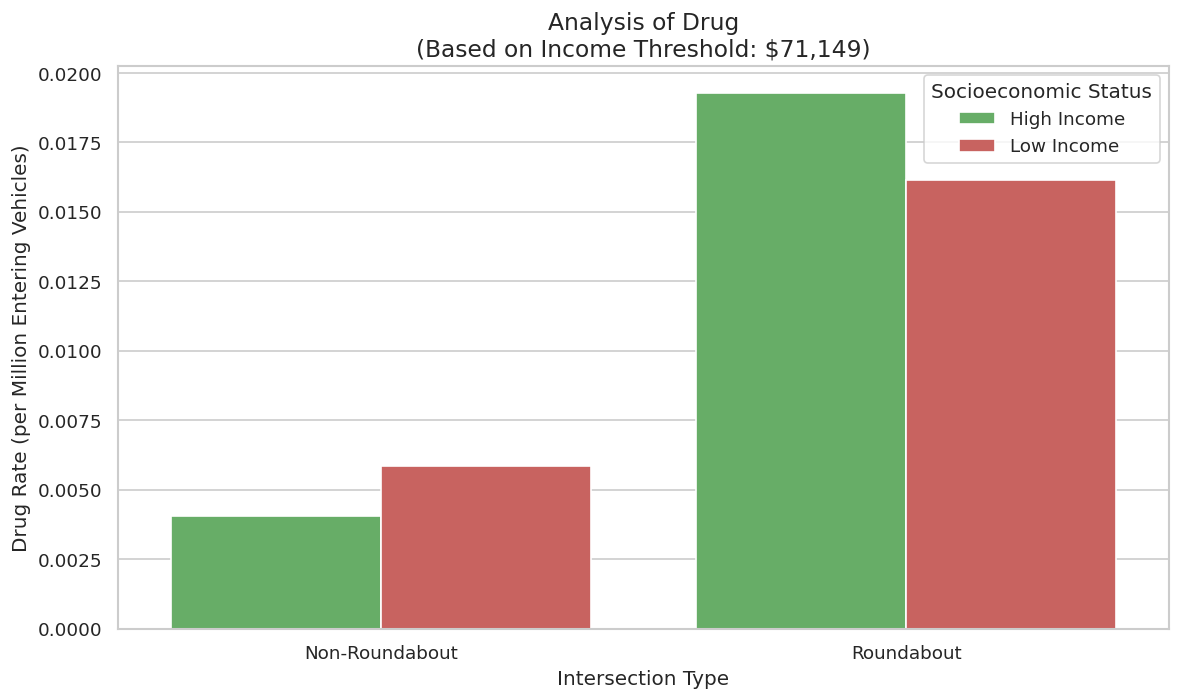

--- Average Alcohol Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.016455
                Low Income      0.023498
Roundabout      High Income     0.063578
                Low Income      0.040500
Name: rate_ALCOHOL, dtype: float64



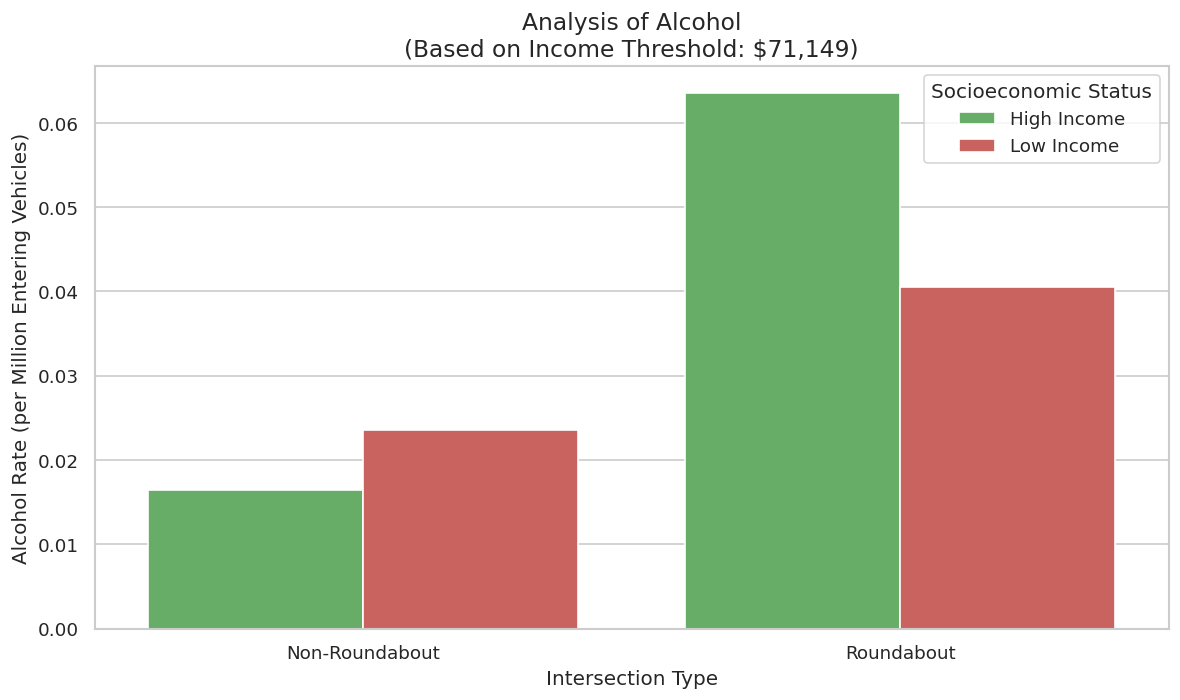

--- Average Speeding Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.026076
                Low Income      0.041744
Roundabout      High Income     0.160294
                Low Income      0.091634
Name: rate_SPEEDING, dtype: float64



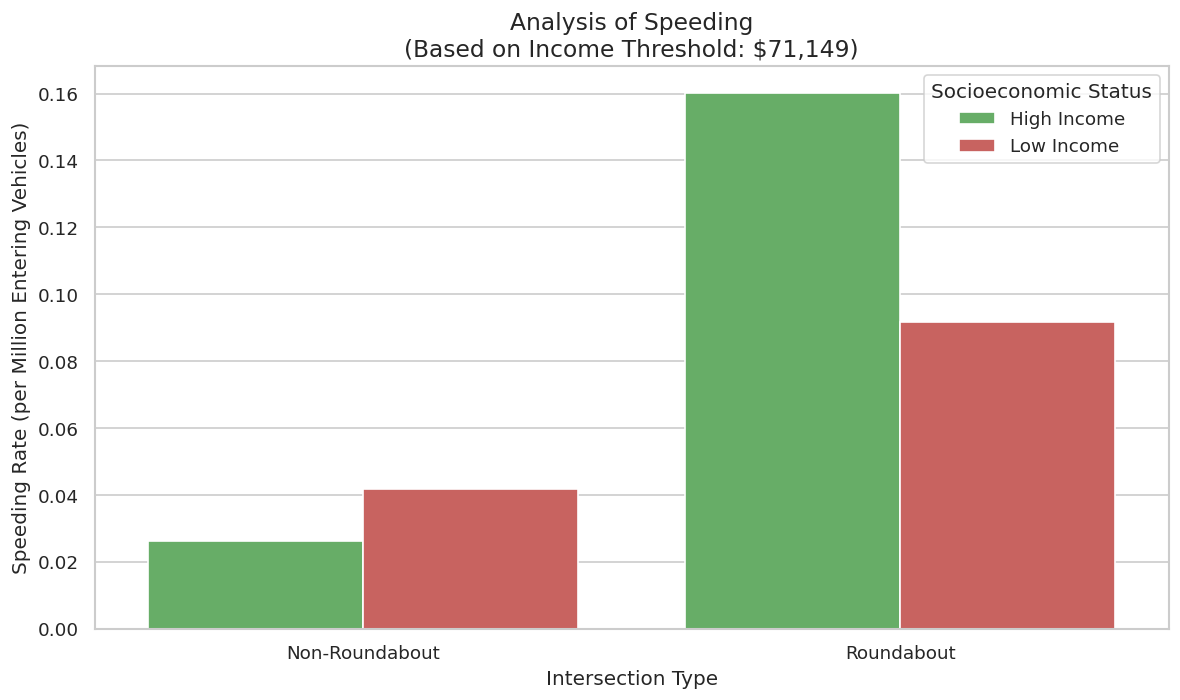

--- Average Hitnrun Rate ---
Type            Income_Group
Non-Roundabout  High Income     0.069738
                Low Income      0.216430
Roundabout      High Income     0.294676
                Low Income      0.816674
Name: rate_HITNRUN, dtype: float64



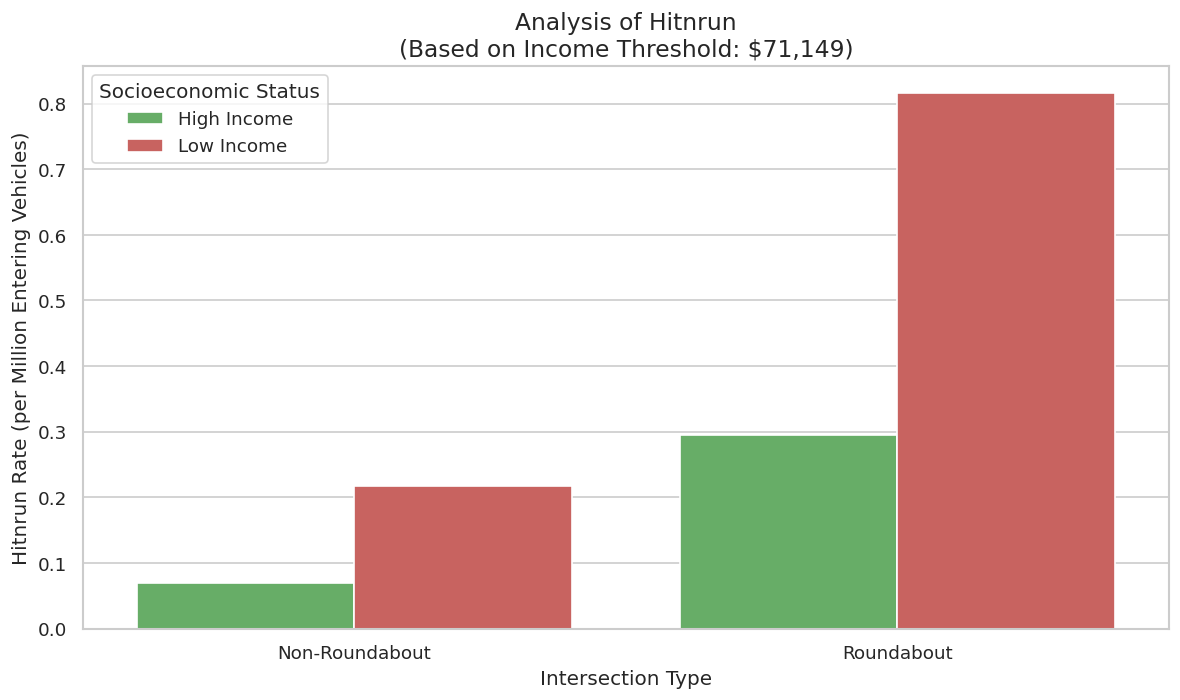

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visualization style
sns.set(style="whitegrid")

# 1. LOAD AND PREPARE DATA
try:
    df_similar = pd.read_csv('Similiar_intersections.csv')
    df_roundabouts = pd.read_csv('Roundabouts.csv')
except FileNotFoundError:
    print("Error: CSV files not found. Please ensure they are in the current directory.")

# Tag the intersection types
df_similar['Type'] = 'Non-Roundabout'
df_roundabouts['Type'] = 'Roundabout'

# Merge the datasets
df_all = pd.concat([df_similar, df_roundabouts], ignore_index=True)

# Remove rows where income data is missing
df_all = df_all.dropna(subset=['Median_HH_Income'])


# 2. INCOME CLASSIFICATION
# Using the specific median threshold provided
MEDIAN_INCOME_THRESHOLD = 71149

def classify_income(income):
    if income >= MEDIAN_INCOME_THRESHOLD:
        return 'High Income'
    else:
        return 'Low Income'

df_all['Income_Group'] = df_all['Median_HH_Income'].apply(classify_income)

# 3. DEFINE SPECIFIC FACTORS
target_factors = [
    'rate_NO_FACTOR',
    'rate_DISTRACTED',
    'rate_DRUG',
    'rate_ALCOHOL',
    'rate_SPEEDING',
    'rate_HITNRUN'
]

print(f"Generating plots for {len(target_factors)} specific safety factors...\n")

# 4. GENERATE FIGURES

for factor in target_factors:
    # Initialize a new figure
    plt.figure(figsize=(10, 6))

    # Generate the Bar Chart
    chart = sns.barplot(
        x='Type',
        y=factor,
        hue='Income_Group',
        data=df_all,
        palette={'Low Income': '#d9534f', 'High Income': '#5cb85c'}, # Red vs Green
        errorbar=None
    )

    # Clean up the label name for the title (e.g., "rate_HITNRUN" -> "Hitnrun")
    clean_name = factor.replace('rate_', '').replace('_', ' ').title()

    # Formatting
    plt.title(f'Analysis of {clean_name}\n(Based on Income Threshold: ${MEDIAN_INCOME_THRESHOLD:,})', fontsize=14)
    plt.ylabel(f'{clean_name} Rate (per Million Entering Vehicles)', fontsize=12)
    plt.xlabel('Intersection Type', fontsize=12)
    plt.legend(title='Socioeconomic Status')

    # Print statistics to the console for verification
    avg_rates = df_all.groupby(['Type', 'Income_Group'])[factor].mean()
    print(f"--- Average {clean_name} Rate ---")
    print(avg_rates)
    print("")

    plt.tight_layout()
    plt.show()
